In [39]:
def save_and_open_excel(dataframe, file_name="模型相關數值.xlsx"):
    """
    將給定的 dataframe 保存到指定的 Excel 工作表中，如果工作表已存在則覆蓋，
    並嘗試在支持的應用程式中打開該 Excel 文件。

    :param dataframe: 要保存的 pandas DataFrame。
    :param file_name: Excel 文件的名稱，默認為 'vif_data.xlsx'。
    """
    import pandas as pd
    import os

    # 獲取 dataframe 的變數名稱
    frame_name = [name for name, var in globals().items() if var is dataframe][0]

    # 檢查工作表是否存在，如果不存在則創建
    if not os.path.isfile(file_name):
        with pd.ExcelWriter(file_name, engine="openpyxl") as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)
    else:
        # 工作表存在，加載工作簿
        with pd.ExcelWriter(
            file_name, engine="openpyxl", mode="a", if_sheet_exists="replace"
        ) as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)

    # 嘗試打開創建的 Excel 文件
    try:
        os.startfile(file_name)
    except AttributeError:
        # 如果 os.startfile() 不可用（例如在非 Windows 系統上），使用適當的替代方案
        if os.name == "posix":
            os.system(f'open "{file_name}"')
        else:
            os.system(f'start "{file_name}"')
    except Exception as e:
        print(f"打開 Excel 文件時發生錯誤: {e}")

In [40]:
import pandas as pd


file_path = r"C:\BDSE33-Final_topic\CSV\DATA總表-0307-參數PR值.csv"

dataset = pd.read_csv(file_path, sep=",", encoding="ANSI")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         4743 non-null   object 
 1   star                         4743 non-null   float64
 2   comment                      4743 non-null   int64  
 3   class                        4743 non-null   object 
 4   address                      4743 non-null   object 
 5   latitude                     4743 non-null   float64
 6   longitude                    4743 non-null   object 
 7   school_counts_PR             4743 non-null   float64
 8   drink_counts_PR              4743 non-null   float64
 9   train_counts_PR              4743 non-null   float64
 10  youbike_counts_PR            4743 non-null   float64
 11  bus_counts_PR                4743 non-null   float64
 12  park_counts_PR               4743 non-null   float64
 13  night_market_count

In [41]:
dataset.describe().round(2)

,star,comment,latitude,school_counts_PR,drink_counts_PR,train_counts_PR,youbike_counts_PR,bus_counts_PR,park_counts_PR,night_market_counts_PR,...,knock_down_price_mean,Monday_open_hours,Tuesday_open_hours,wendesday_open_hours,Thursday_open_hours,Friday_open_hours,Saturday_open_hours,Sunday_open_hours,weekend_open,grade
count,4743.00,4743.00,4743.00,4743.00,4743.00,4743.00,4743.00,4743.00,4743.00,4743.00,...,4741.00,3647.00,3643.00,3616.00,3601.00,3582.00,3381.00,2694.00,4743.00,4743.00
mean,4.02,133.47,25.04,0.45,0.50,0.14,0.49,0.49,0.48,0.28,...,7963.17,10.45,10.48,10.50,10.54,10.62,10.60,10.80,1.28,4.31
std,1.06,165.51,0.06,0.29,0.29,0.31,0.30,0.29,0.29,0.32,...,11745.73,2.19,2.18,2.18,2.15,2.12,2.17,1.99,0.88,2.06
min,0.00,0.00,23.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,3.80,18.00,25.01,0.23,0.24,0.00,0.24,0.24,0.25,0.00,...,1338.00,9.00,9.00,9.00,9.50,9.50,9.50,10.00,0.00,2.94
50%,4.30,75.00,25.04,0.50,0.50,0.00,0.50,0.49,0.46,0.00,...,2249.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,2.00,4.24
75%,4.70,189.00,25.07,0.73,0.75,0.00,0.74,0.74,0.75,0.54,...,4410.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,2.00,5.69
max,5.00,1313.00,25.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,38094.00,23.50,23.50,23.50,24.00,23.50,23.50,23.00,2.00,9.04


In [42]:
# 要分析相關性的資料
# # selected_data = dataset.iloc[:, 7:36]
# selected_data = dataset.iloc[:, 7:10]
# selected_data

# 使用 concat() 函式合併資料框，axis=0 表示按列合併
merged_data = pd.concat(
    [
        dataset.iloc[:, 7:10],
        dataset.iloc[:, 11:12],
        dataset.iloc[:, 14:15],
        dataset.iloc[:, 15:16],
    ],
    axis=1,
)
selected_data = merged_data

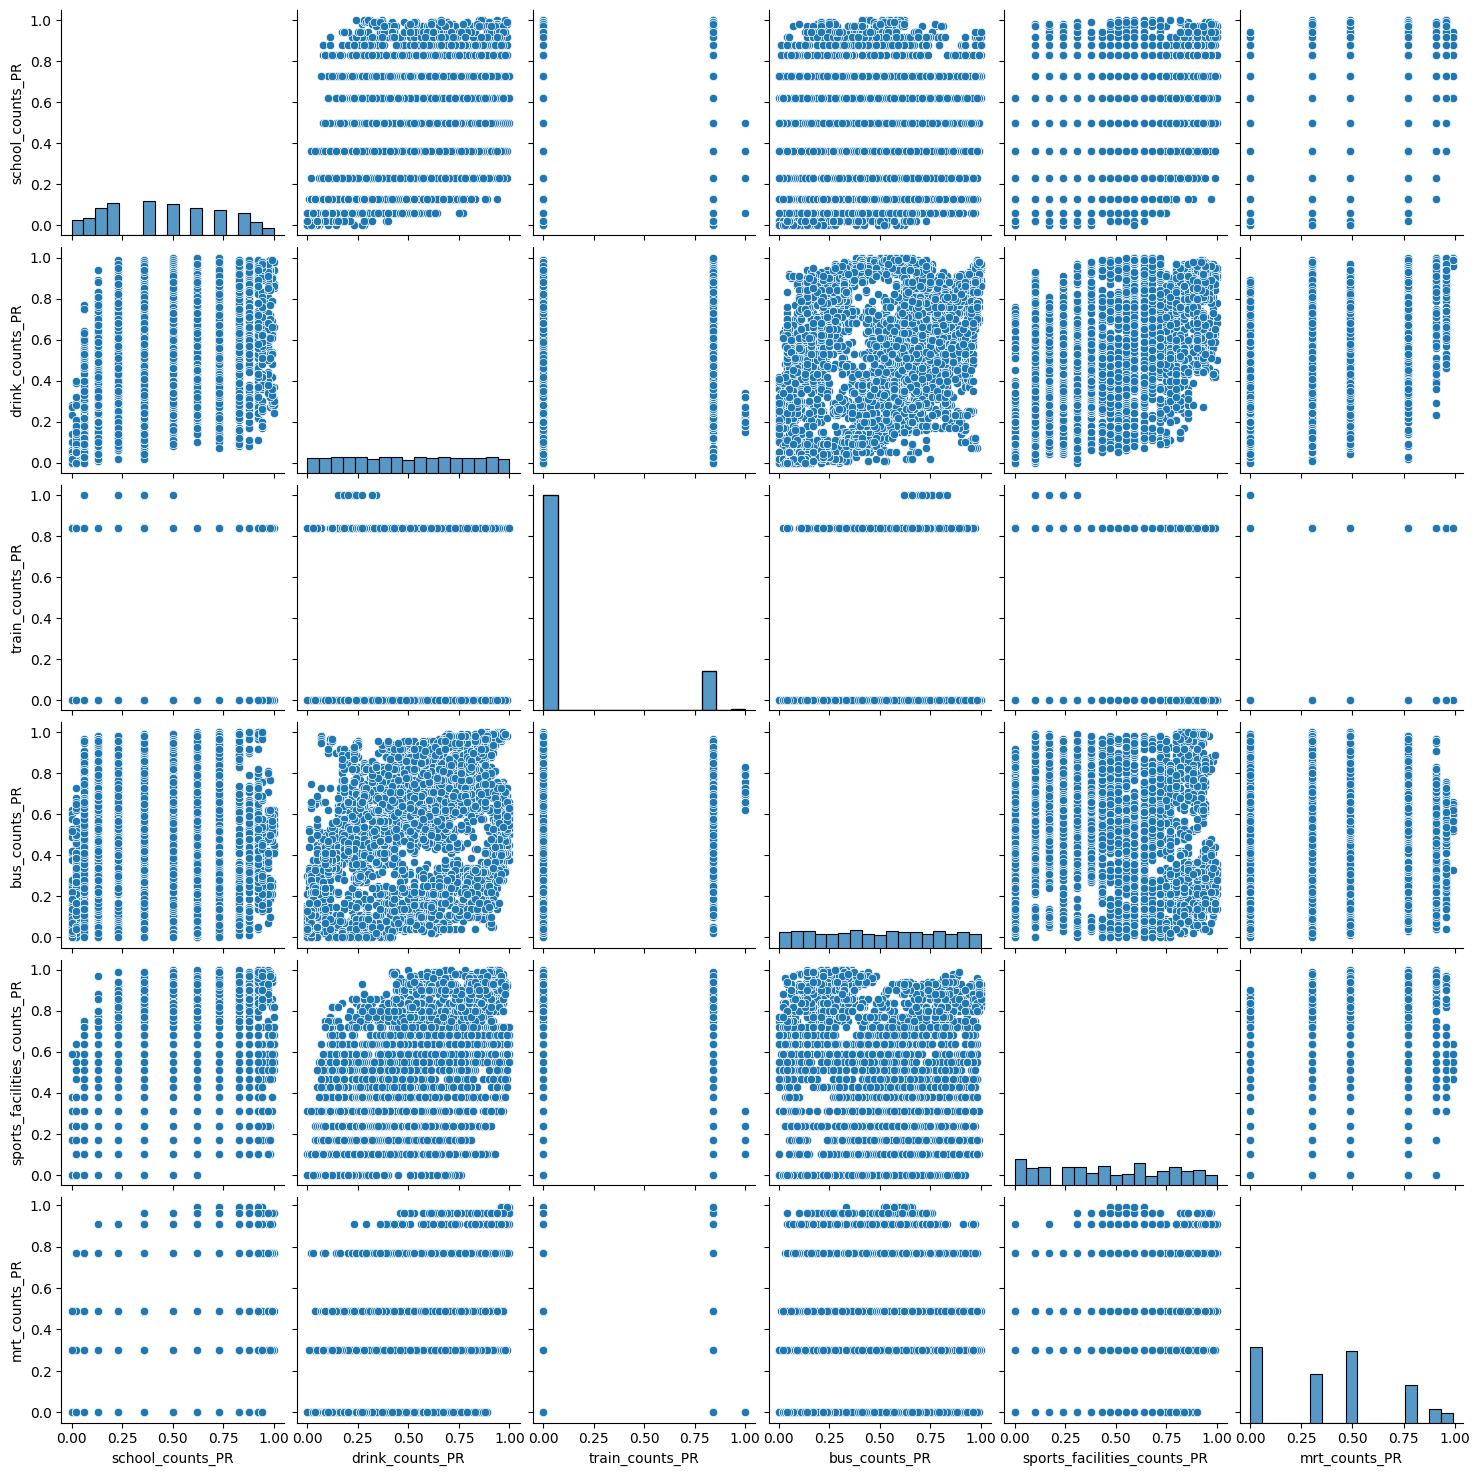

In [43]:
# 參數畫散點圖
import seaborn as sns

sns.pairplot(selected_data)

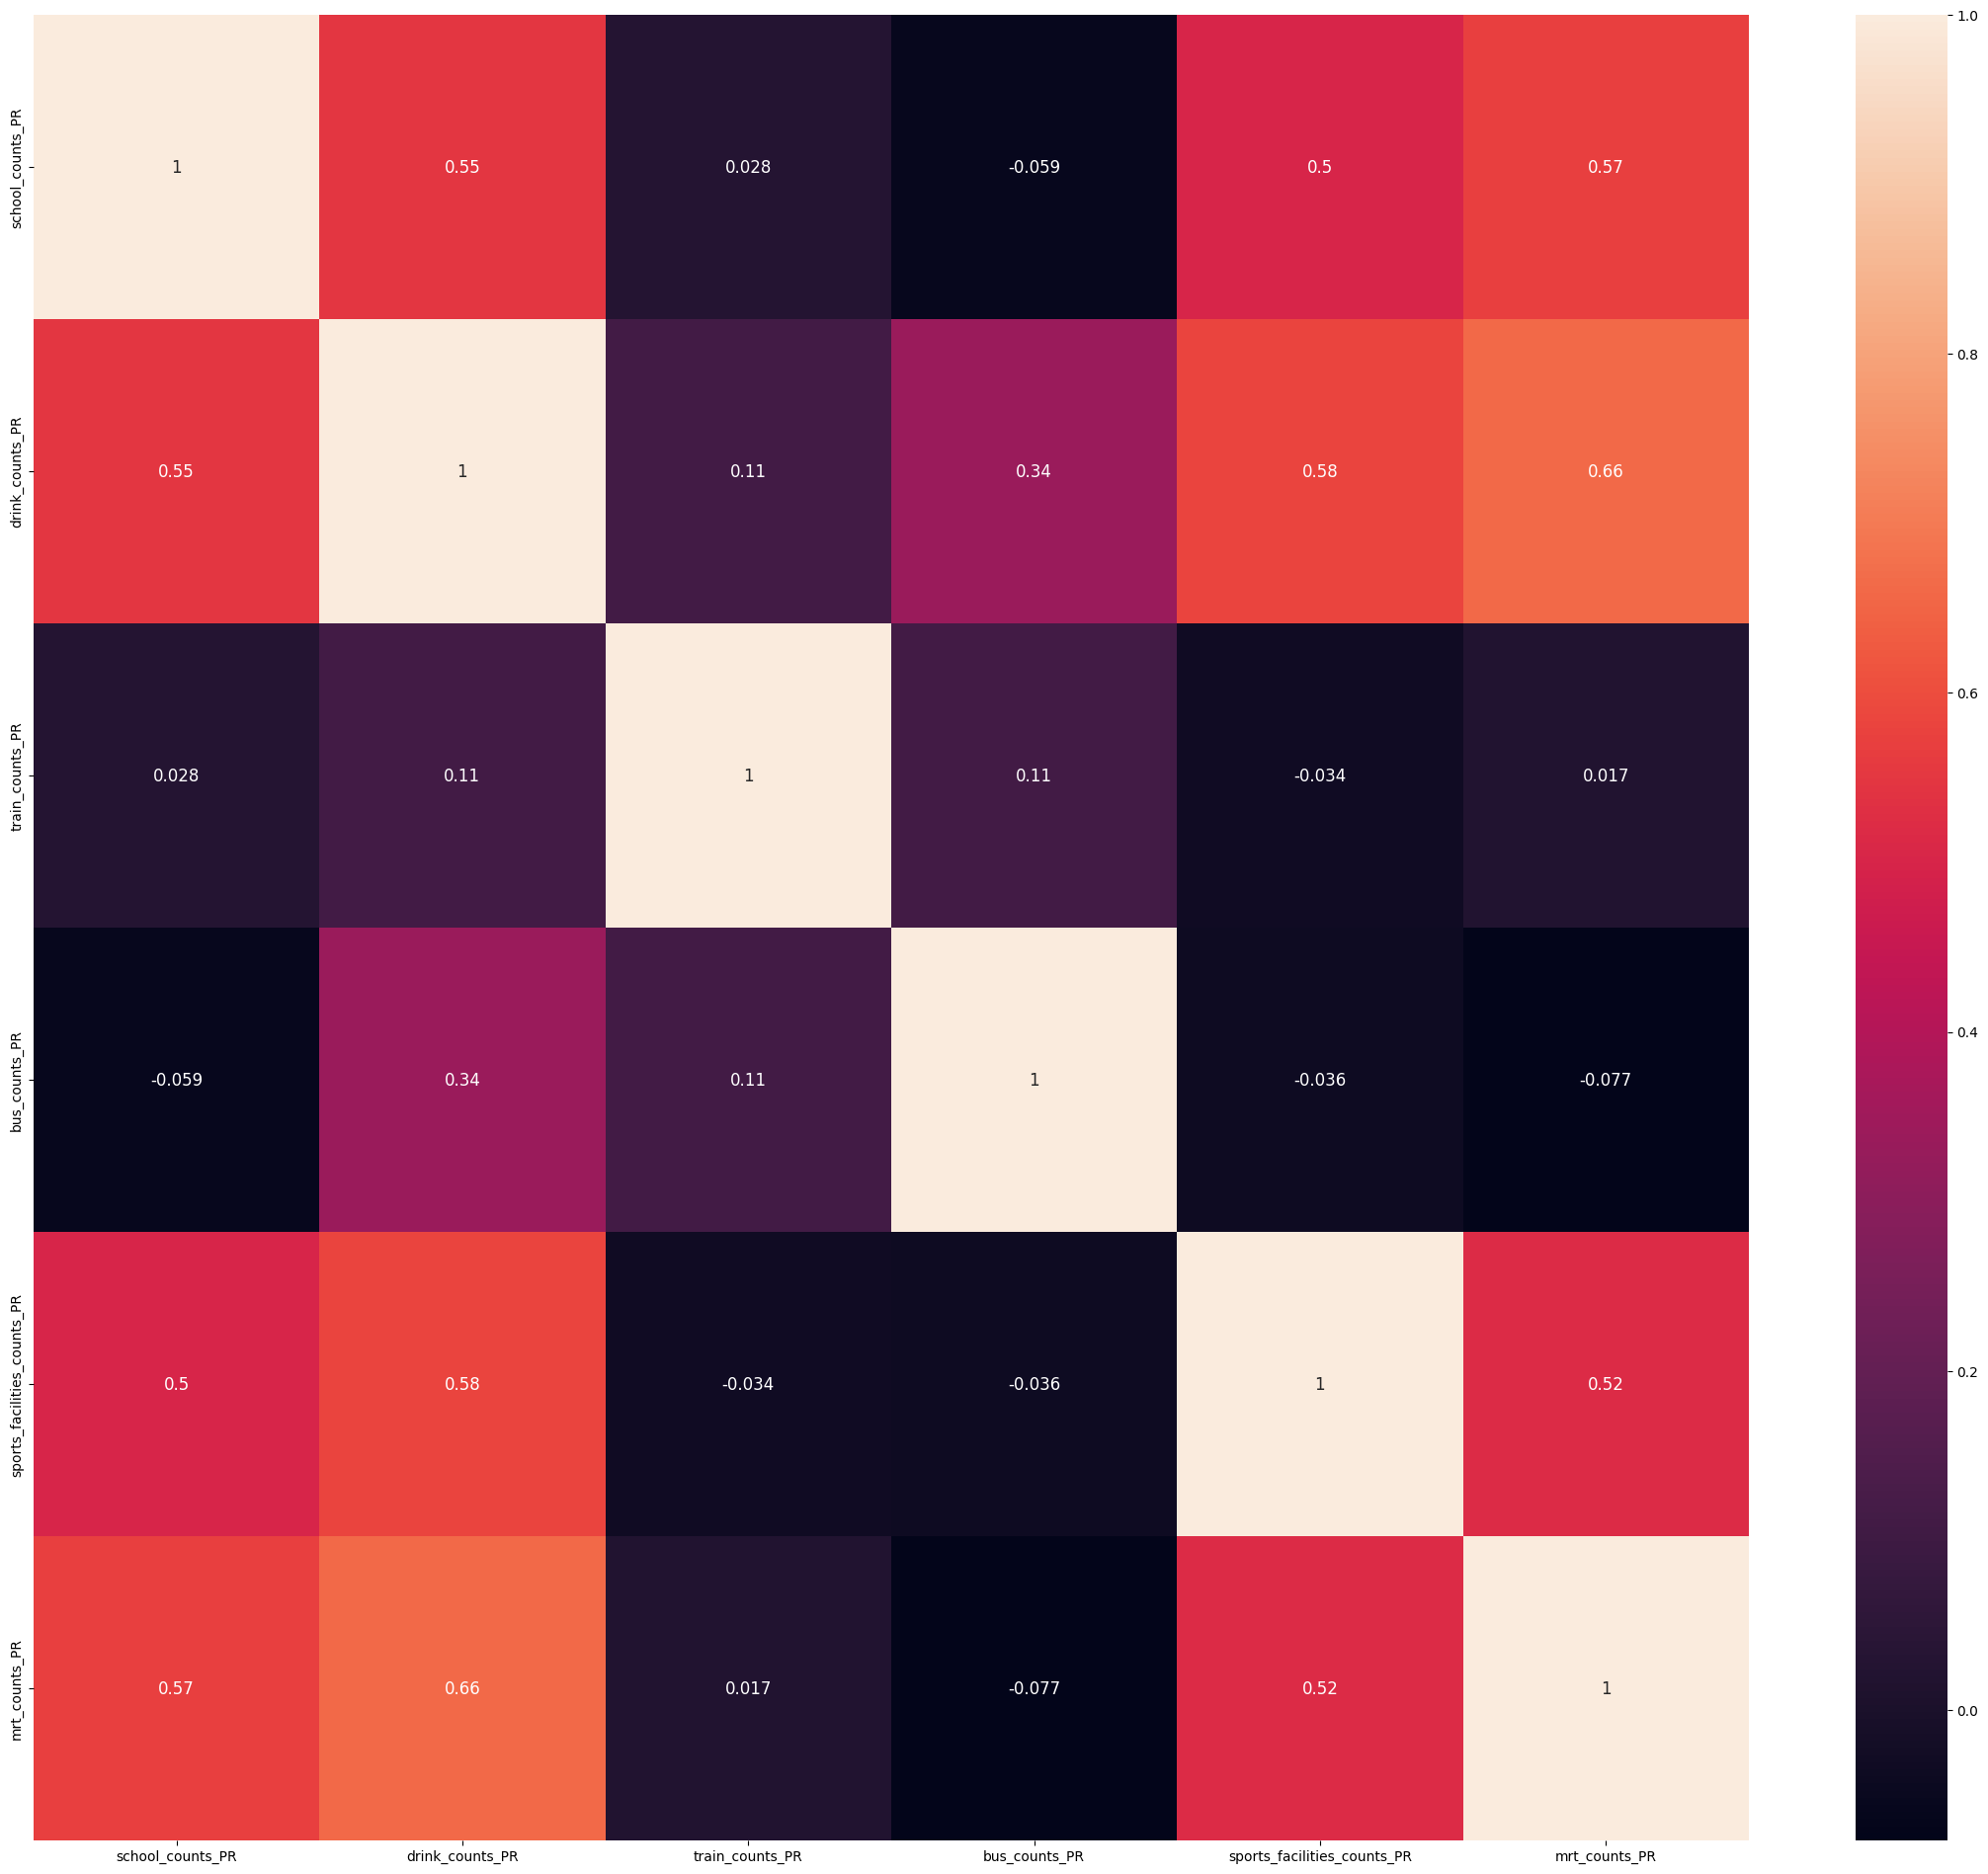

In [9]:
# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = selected_data.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat, annot=True, annot_kws={"size": 12})
plt.show()

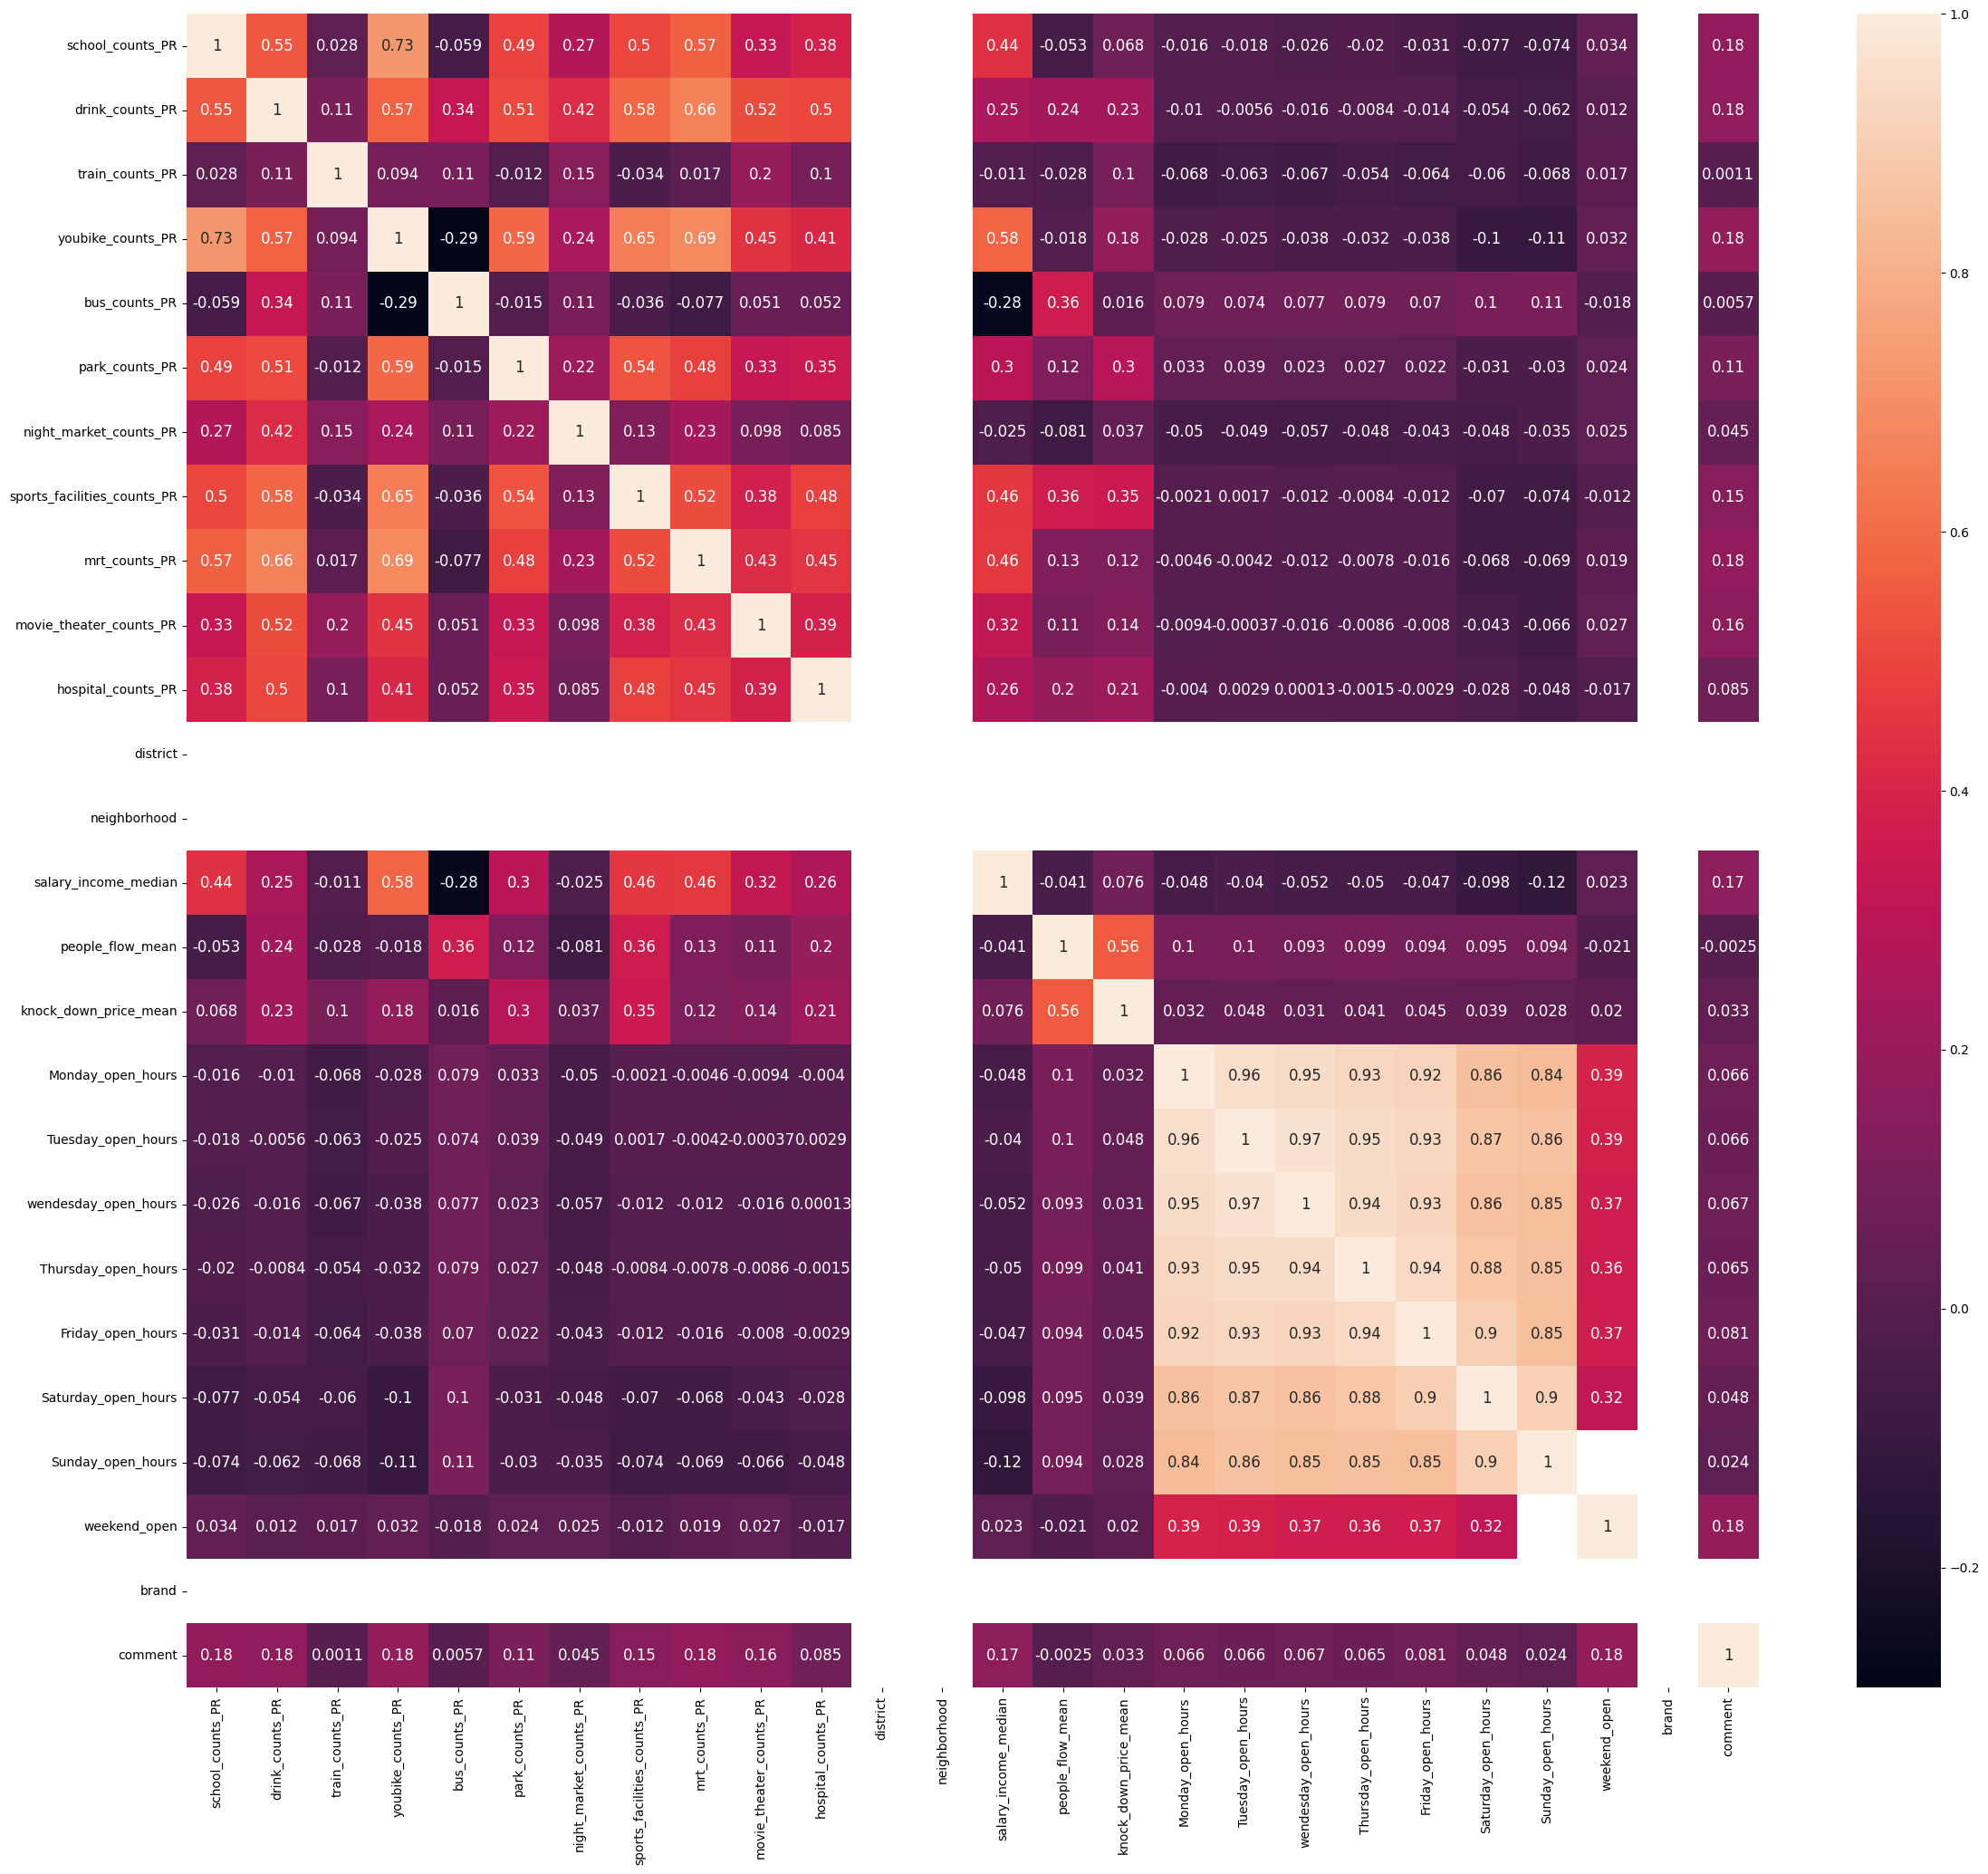

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\BDSE33-Final_topic\CSV\DATA總表-0307-參數PR值.csv"
dataset = pd.read_csv(file_path, sep=",", encoding="ANSI")

# 將非數字的列轉換為數字
numeric_columns = dataset.columns[7:36]
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 計算相關矩陣
merged_data_test = pd.concat(
    [dataset.iloc[:, 7:36], dataset.iloc[:, 2:3]],
    axis=1,
)
selected_data_test = merged_data_test
corrmat_test = selected_data_test.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat_test, annot=True, annot_kws={"size": 12})
plt.show()


In [11]:
# import pandas as pd

# file_path = r"C:\BDSE33-Final_topic\CSV\DATA總表-0307-參數PR值.csv"
# dataset = pd.read_csv(file_path, sep=",", encoding="ANSI")

# # 計算相關矩陣
# import seaborn as sns
# import matplotlib.pyplot as plt

# merged_data_test = pd.concat(
#     [dataset.iloc[:, 7:36], dataset.iloc[:, 2:3]],
#     axis=1,
# )
# selected_data_test = merged_data_test
# selected_data_test
# corrmat_test = selected_data_test.corr()

# # 繪製熱力圖
# plt.figure(figsize=(28, 24))
# sns.heatmap(corrmat_test, annot=True, annot_kws={"size": 12})
# plt.show()



ValueError: could not convert string to float: '三峽區'

In [52]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

selected_data = selected_data_test

# 假設 dataset 是您的 DataFrame
# 首先，給數據集添加一個常數項，這對於VIF計算是必要的
dataset_with_constant = add_constant(selected_data)

# 初始化一個空的DataFrame來存儲VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = dataset_with_constant.columns

# 計算每個變數的VIF值並存儲
vif_data["VIF"] = [
    variance_inflation_factor(dataset_with_constant.values, i)
    for i in range(dataset_with_constant.shape[1])
]

# save_and_open_excel(vif_data)
vif_data

MissingDataError: exog contains inf or nans

In [51]:
# 設定模型輸入x
X = selected_data.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)  # 轉換成1個column。從橫的轉乘直的

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)
y


array([[2.17],
       [2.21],
       [3.21],
       ...,
       [2.85],
       [0.71],
       [3.12]])

### 模型

## Linear Regression

In [46]:
"""
1.建立空模型
2.擬合
"""

from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

from sklearn.metrics import r2_score

y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print("R2_score (train): ", r2_score_linear_train)
print("R2_score (test): ", r2_score_linear_test)
print("RMSE_score (train): ", rmse_train)
print("RMSE_score (test): ", rmse_test)

R2_score (train):  0.9029666437782029
R2_score (test):  0.9052652802849559
RMSE_score (train):  0.6411615175123893
RMSE_score (test):  0.6398536341414105


In [47]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     8901.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:39:23   Log-Likelihood:                -4616.0
No. Observations:                4743   AIC:                             9244.
Df Residuals:                    4737   BIC:                             9283.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5134      0.026     19.992      0.0

## Polynomial regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # 從sklearn的preprocessing模組中導入PolynomialFeatures類，用於生成一個新的特徵矩陣，其中包含所有多項式組合的特徵，其次數小於或等於指定的度數。

poly_reg = PolynomialFeatures(
    degree=3
)  # 創建一個PolynomialFeatures的實例poly_reg，指定多項式的度數為2。

X_poly = poly_reg.fit_transform(X_train)  # 對訓練數據X_train進行變換，生成多項式特徵。

regressor_poly2 = LinearRegression()  # 創建一個線性回歸(Linear Regression)模型的實例。

regressor_poly2.fit(
    X_poly, y_train
)  # 使用包含多項式特徵的X_poly和訓練集的目標值y_train來訓練線性回歸模型。

y_pred_poly2_train = regressor_poly2.predict(
    poly_reg.fit_transform(X_train)
)  # 對訓練集進行預測。

r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)  # 計算訓練集的R^2分數。

y_pred_poly2_test = regressor_poly2.predict(
    poly_reg.fit_transform(X_test)
)  # 對測試集進行預測。

r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)  # 計算測試集的R^2分數。

rmse_train = np.sqrt(
    mean_squared_error(y_train, y_pred_poly2_train)
)  # 計算訓練集的均方根誤差(RMSE)。

rmse_test = np.sqrt(
    mean_squared_error(y_test, y_pred_poly2_test)
)  # 計算測試集的均方根誤差(RMSE)。
print("R2_score (train): ", r2_score_poly2_train)
print("R2_score (test): ", r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.9323989836801733
R2_score (test):  0.9317870453035955
RMSE:  0.5351598633288088
RMSE:  0.5429495587652048


In [20]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 假設您有一個訓練集 X_train 和目標值 y_train
# 創建多項式特徵
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# 使用Lasso正則化
alpha_lasso = 0.01  # 正則化參數
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_poly_train, y_train)

# 進行預測
y_pred_lasso_train = lasso_model.predict(X_poly_train)
y_pred_lasso_test = lasso_model.predict(X_poly_test)

# 計算R^2分數
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# 計算均方根誤差(RMSE)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print("Lasso正則化:")
print("R2_score (train): ", r2_score_lasso_train)
print("R2_score (test): ", r2_score_lasso_test)
print("RMSE: ", rmse_lasso_train)
print("RMSE: ", rmse_lasso_test)

"""
# 使用Ridge正則化
alpha_ridge = 0.01  # 正則化參數
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_poly, y_train)


y_pred_ridge = ridge_model.predict(X_poly)
r2_score_ridge = r2_score(y_train, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))

print("\nRidge正則化:")
print("R2分數:", r2_score_ridge)

print("RMSE:", rmse_ridge)
"""

Lasso正則化:
R2_score (train):  0.0747341215947892
R2_score (test):  0.041966907105922546
RMSE:  158.80097640264634
RMSE:  162.8534754853351


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+07, tolerance: 9.049e+03
  model = cd_fast.enet_coordinate_descent(


'\n# 使用Ridge正則化\nalpha_ridge = 0.01  # 正則化參數\nridge_model = Ridge(alpha=alpha_ridge)\nridge_model.fit(X_poly, y_train)\n\n\ny_pred_ridge = ridge_model.predict(X_poly)\nr2_score_ridge = r2_score(y_train, y_pred_ridge)\nrmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))\n\nprint("\nRidge正則化:")\nprint("R2分數:", r2_score_ridge)\n\nprint("RMSE:", rmse_ridge)\n'

In [21]:
import pandas as pd

"""
測試 alpha_range 到 10
發現 R2_score 依舊 不達 3%
"""
alpha_values = []
r2_score_train_values = []
r2_score_test_values = []
rmse_train_values = []
rmse_test_values = []

# 定義alpha_lasso的範圍和增量
alpha_range = np.arange(0.01, 10.01, 0.05)

for alpha_lasso in alpha_range:
    # 使用Lasso正則化
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_poly_train, y_train)

    # 進行預測
    y_pred_lasso_train = lasso_model.predict(X_poly_train)
    y_pred_lasso_test = lasso_model.predict(X_poly_test)

    # 計算R^2分數
    r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
    r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

    # 計算均方根誤差(RMSE)
    rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
    rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

    # 將結果添加到列表中
    alpha_values.append(alpha_lasso)
    r2_score_train_values.append(r2_score_lasso_train)
    r2_score_test_values.append(r2_score_lasso_test)
    rmse_train_values.append(rmse_lasso_train)
    rmse_test_values.append(rmse_lasso_test)

# 創建DataFrame來存儲結果
results_df = pd.DataFrame(
    {
        "Alpha": alpha_values,
        "R2 Score (Train)": r2_score_train_values,
        "R2 Score (Test)": r2_score_test_values,
        "RMSE (Train)": rmse_train_values,
        "RMSE (Test)": rmse_test_values,
    }
)

# 輸出結果表
print(results_df)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+07, tolerance: 9.049e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.938e+04, tolerance: 9.049e+03
  model = cd_fast.enet_coordinate_descent(


     Alpha  R2 Score (Train)  R2 Score (Test)  RMSE (Train)  RMSE (Test)
0     0.01          0.074734         0.041967    158.800976   162.853475
1     0.06          0.059957         0.049696    160.064017   162.195258
2     0.11          0.054473         0.050243    160.530226   162.148510
3     0.16          0.051523         0.049616    160.780433   162.202078
4     0.21          0.049272         0.048470    160.971159   162.299851
..     ...               ...              ...           ...          ...
195   9.76          0.000000        -0.000729    165.089668   166.442823
196   9.81          0.000000        -0.000729    165.089668   166.442823
197   9.86          0.000000        -0.000729    165.089668   166.442823
198   9.91          0.000000        -0.000729    165.089668   166.442823
199   9.96          0.000000        -0.000729    165.089668   166.442823

[200 rows x 5 columns]


## Ridge regression

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [23]:
ridgeReg = Ridge(alpha=5.5)  # 創建 Ridge 回歸模型的一個實例，指定 alpha 參數為 5.5

ridgeReg.fit(X_train, y_train)  # 使用訓練數據進行擬合，訓練 Ridge 回歸模型

y_pred_ridge_train = ridgeReg.predict(X_train)  # 對訓練集進行預測

r2_score_ridge_train = ridgeReg.score(X_train, y_train)  # 計算訓練集上的 R2 分數

y_pred_ridge_test = ridgeReg.predict(X_test)  # 對測試集進行預測

r2_score_ridge_test = ridgeReg.score(X_test, y_test)  # 計算測試集上的 R2 分數

rmse_ridge_train = np.sqrt(
    mean_squared_error(y_train, y_pred_ridge_train)
)  # 計算訓練集的均方根誤差(RMSE)

rmse_ridge_test = np.sqrt(
    mean_squared_error(y_test, y_pred_ridge_test)
)  # 計算測試集的均方根誤差(RMSE)

# print("coef：")
# for i, j in zip(dataset.columns, ridgeReg.coef_[0]):  # 逐一列出模型的係數
#     print(i, j)
print("R2_score (train): ", r2_score_ridge_train)
print("R2_score (test): ", r2_score_ridge_test)
print("RMSE: ", rmse_ridge_train)
print("RMSE: ", rmse_ridge_test)

R2_score (train):  0.04235385991303564
R2_score (test):  0.045879183141089075
RMSE:  161.55575242268796
RMSE:  162.52061666343891


In [24]:
import pandas as pd

"""
測試 alpha_range 到 10
發現 R2_score 依舊 不達 1%
"""
alpha_values = []
r2_score_train_values = []
r2_score_test_values = []
rmse_train_values = []
rmse_test_values = []

# 定義alpha_ridge的範圍和增量
alpha_ridge = np.arange(0.01, 10.01, 0.05)

for alpha in alpha_ridge:
    # 使用Ridge正則化
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly, y_train)

    # 進行預測
    y_pred_ridge_train = ridge_model.predict(X_poly_train)
    y_pred_ridge_test = ridge_model.predict(X_poly_test)

    # 計算R^2分數
    r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
    r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

    # 計算均方根誤差(RMSE)
    rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
    rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

    # 將結果添加到列表中
    alpha_values.append(alpha)
    r2_score_train_values.append(r2_score_ridge_train)
    r2_score_test_values.append(r2_score_ridge_test)
    rmse_train_values.append(rmse_ridge_train)
    rmse_test_values.append(rmse_ridge_test)

# 創建DataFrame來存儲結果
results_df = pd.DataFrame(
    {
        "Alpha": alpha_values,
        "R2 Score (Train)": r2_score_train_values,
        "R2 Score (Test)": r2_score_test_values,
        "RMSE (Train)": rmse_train_values,
        "RMSE (Test)": rmse_test_values,
    }
)

# 輸出結果表
print(results_df)

     Alpha  R2 Score (Train)  R2 Score (Test)  RMSE (Train)  RMSE (Test)
0     0.01          0.079669         0.029294    158.376904   163.927071
1     0.06          0.078011         0.036254    158.519561   163.338335
2     0.11          0.076670         0.039817    158.634773   163.036099
3     0.16          0.075522         0.042090    158.733391   162.842994
4     0.21          0.074522         0.043675    158.819182   162.708251
..     ...               ...              ...           ...          ...
195   9.76          0.055475         0.051772    160.445153   162.017999
196   9.81          0.055453         0.051772    160.447044   162.018003
197   9.86          0.055431         0.051771    160.448925   162.018009
198   9.91          0.055409         0.051771    160.450794   162.018017
199   9.96          0.055387         0.051771    160.452654   162.018026

[200 rows x 5 columns]


## RF隨機森林

In [25]:
# 設定模型輸入x
X = dataset.iloc[:, 7:36].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)  # 轉換成1個column。從橫的轉乘直的

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割數據集為訓練集和測試集
# X = selected_features.drop('comment', axis=1)  # 特徵
# y = selected_features['comment']  # 預測目標

# 分割數據，80%用於訓練，20%用於測試
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=100)
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 預測測試集
y_pred = rf_model.predict(X_test)

# 計算訓練集的性能指標
mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
r2_train = r2_score(y_train, rf_model.predict(X_train))
rmse_train = np.sqrt(mse_train)

# 計算測試集的性能指標
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# 列印指標

print("R2_score (train): ", r2_train)
print("R2_score (test): ", r2_test)
print("RMSE (train): ", rmse_train)
print("RMSE (test): ", rmse_test)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2_score (train):  0.22637637863280724
R2_score (test):  0.09781835543823125
RMSE (train):  145.20606482285493
RMSE (test):  158.03517777038516


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 轉換評論數為二分類目標
y_class = (y > y.median()).astype(int)  # 將評論數量高於中位數視為一類，其餘為另一類

# 分割數據
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# 建立隨機森林分類模型
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# 進行預測
y_pred_class = rf_classifier.predict(X_test_class)

# 計算準確率和其他性能指標
accuracy_class = accuracy_score(y_test_class, y_pred_class)
classification_report_class = classification_report(y_test_class, y_pred_class)

accuracy_class, classification_report_class

AttributeError: 'numpy.ndarray' object has no attribute 'median'